In [11]:
import pandas as pd
import numpy as np

In [154]:
df = pd.read_csv("../datasets/MDIP_2013_2021.csv")

In [155]:
df['LONGITUDE'] = df['LONGITUDE'].apply(lambda x: str(x).replace(",", "."))
df['LATITUDE'] = df['LATITUDE'].apply(lambda x: str(x).replace(",", "."))

In [156]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [165]:
# from geopy.geocoders import Nominatim
import time
import geopy
from tqdm import tqdm
geolocator = geopy.geocoders.ArcGIS()

end_encontradas = 0
end_nao_encontrados = 0

for i, v in tqdm(df.iterrows()):
    if v['LONGITUDE'] == 0.0 or v['LATITUDE'] == 0.0:
        if "DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS" in v['LOGRADOURO']:
            location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            try:
                df.loc[i, 'LATITUDE'] = location.latitude
                df.loc[i, 'LONGITUDE'] = location.longitude
                time.sleep(1)
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP {e}" )
                df.drop([i])
                end_nao_encontrados += 1
        else:
            location = geolocator.geocode(f"{v['LOGRADOURO'].replace('S.', 'São ')}, {v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            try:
                df.loc[i, 'LATITUDE'] = location.latitude
                df.loc[i, 'LONGITUDE'] = location.longitude
                time.sleep(1)
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP {e}" )
                try:
                    location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
                    df.loc[i, 'LATITUDE'] = location.latitude
                    df.loc[i, 'LONGITUDE'] = location.longitude
                    time.sleep(1)
                    end_nao_encontrados += 1
                except:
                    df = df.drop([i])
                    end_nao_encontrados += 1
    

    elif v['LONGITUDE'] == "na" or v['LONGITUDE'] == "nan" or v['LATITUDE'] == "na" or v['LATITUDE'] == "nan" :
        if "DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS" in v['LOGRADOURO']:
            location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            try:
                df.loc[i, 'LATITUDE'] = location.latitude
                df.loc[i, 'LONGITUDE'] = location.longitude
                time.sleep(1)
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP {e}" )
                df = df.drop([i])
                end_nao_encontrados += 1
        else:
            location = geolocator.geocode(f"{v['LOGRADOURO'].replace('S.', 'São ')}, {v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            try:
                df.loc[i, 'LATITUDE'] = location.latitude
                df.loc[i, 'LONGITUDE'] = location.longitude
                time.sleep(1)
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP {e}" )
                try:
                    location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
                    df.loc[i, 'LATITUDE'] = location.latitude
                    df.loc[i, 'LONGITUDE'] = location.longitude
                    time.sleep(1)
                    end_nao_encontrados += 1
                except:
                    df = df.drop([i])
                    end_nao_encontrados += 1
            

    elif is_number(v['LONGITUDE']):
        df.loc[i, 'LATITUDE'] = float(v['LATITUDE'])
        df.loc[i, 'LONGITUDE'] = float(v['LONGITUDE'])
    else:
        if "DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS" in v['LOGRADOURO']:
            location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            try:
                df.loc[i, 'LATITUDE'] = location.latitude
                df.loc[i, 'LONGITUDE'] = location.longitude
                time.sleep(1)
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP {e}" )
                df = df.drop([i])
                end_nao_encontrados += 1
        else:
            location = geolocator.geocode(f"{v['LOGRADOURO'].replace('S.', 'São ')}, {v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            try:
                df.loc[i, 'LATITUDE'] = float(location.latitude)
                df.loc[i, 'LONGITUDE'] = float(location.longitude)

                time.sleep(1)
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP, {e}")
                try:
                    location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
                    df.loc[i, 'LATITUDE'] = location.latitude
                    df.loc[i, 'LONGITUDE'] = location.longitude
                    time.sleep(1)
                    end_nao_encontrados += 1
                except:
                    df = df.drop([i])
                    end_nao_encontrados += 1

print(f"Endereços Encontrados: {end_encontradas}; Endereços não encontrados {end_nao_encontrados};")

6895it [22:15,  5.16it/s]

Endereços Encontrados: 1123; Endereços não encontrados 0;


In [172]:
for i, v in tqdm(df.iterrows()):
    if v['LATITUDE'] == 0 or v['LATITUDE'] == 0.0 or v['LONGITUDE'] == 0 or v['LONGITUDE'] == 0.0:
        if "DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS" in v['LOGRADOURO']:
            location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            try:
                df.loc[i, 'LATITUDE'] = location.latitude
                df.loc[i, 'LONGITUDE'] = location.longitude
                time.sleep(1)
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP {e}" )
                df.drop([i])
                end_nao_encontrados += 1
        else:
            location = geolocator.geocode(f"{v['LOGRADOURO'].replace('S.', 'São ')}, {v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
            time.sleep(1)
            try:
                df.loc[i, 'LATITUDE'] = location.latitude
                df.loc[i, 'LONGITUDE'] = location.longitude
                end_encontradas += 1
            except Exception as e:
#                 print(f"Endereço não encontrado: {v['LOGRADOURO'].replace('S.', 'São ')}, {v['MUNICIPIO_CIRC'].replace('S.', 'São ')}-SP {e}" )
                try:
                    location = geolocator.geocode(f"{v['CIDADE_ELABORACAO'].replace('S.', 'São ')}-SP, Brazil")
                    df.loc[i, 'LATITUDE'] = location.latitude
                    df.loc[i, 'LONGITUDE'] = location.longitude
                    time.sleep(1)
                    end_nao_encontrados += 1
                except:
                    df = df.drop([i])
                    end_nao_encontrados += 1
    

6895it [11:09, 10.30it/s]


In [173]:
df

,CIDADE_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,NUM_BO,ANO_BO,DATA_FATO,dia,mês,ano,MÊS OCOR,...,DESCR_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,NATUREZAS,CONDUTA,DESDOBRAMENTO,FLAG_VITIMA_FATAL,DATAHORA_REGISTRO_BO
0,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2,2013,01/01/2013,1,1,2013,1,...,Via pública,R LUIS MATHEUS,1,-23.5427,-46.4249,Homicídio simples (art. 121),NaN,NaN,Sim,01/01/2013
1,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,4,2013,01/01/2013,1,1,2013,1,...,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,-23.5507,-46.6334,Resistência (art. 329),NaN,NaN,Sim,01/01/2013
2,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,6,2013,02/01/2013,2,1,2013,1,...,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,-23.5507,-46.6334,Ato Infracional,NaN,NaN,Sim,02/01/2013
3,BAURU,DEL.SEC.BAURU,DEINTER 4 - BAURU,9,2013,30/01/2013,30,1,2013,1,...,Via pública,R SANTA AGUEDA,96,-22.3137,-49.0317,Homicídio simples (art. 121),NaN,NaN,Sim,31/01/2013
4,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,9,2013,03/01/2013,3,1,2013,1,...,Via pública,R ORMINDA PINTO VIELA,6,-23.5272,-46.4026,Resistência (art. 329),NaN,NaN,Sim,03/01/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,238,2021,29/05/2021,29,5,2021,5,...,Via pública,AVENIDA FIM DE SEMANA,240,-23.6548,-46.7474,"Resistência (art. 329), Homicídio simples (art...",OUTROS,§2o.Se a violência ou grave ameaça é exercida ...,Sim,29/05/2021
6892,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,237,2021,28/05/2021,28,5,2021,5,...,Via pública,RUA DOS TRILHOS,100,-23.5524,-46.6092,Homicídio simples (art. 121),NaN,Lesão corporal decorrente de intervenção polic...,Sim,29/05/2021
6893,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,236,2021,28/05/2021,28,5,2021,5,...,Via pública,RUA PROFESSOR ANTONIO MARIA MOURA,118,-23.6697,-46.7428,Homicídio simples (art. 121),VEICULO,§2o.Se a violência ou grave ameaça é exercida ...,Sim,29/05/2021
6894,S.VICENTE,DEL.SEC.PRAIA GRANDE,DEINTER 6 - SANTOS,1120,2021,31/05/2021,31,5,2021,5,...,Via pública,AVENIDA BRASIL,315,-23.9656,-46.4134,"Homicídio simples (art. 121), Localização/Apre...",NaN,"Art. 329 - Opor-se à execução de ato legal, me...",Sim,31/05/2021


In [167]:
df.drop([3835])

,CIDADE_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,NUM_BO,ANO_BO,DATA_FATO,dia,mês,ano,MÊS OCOR,...,DESCR_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,NATUREZAS,CONDUTA,DESDOBRAMENTO,FLAG_VITIMA_FATAL,DATAHORA_REGISTRO_BO
0,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,2,2013,01/01/2013,1,1,2013,1,...,Via pública,R LUIS MATHEUS,1,-23.5427,-46.4249,Homicídio simples (art. 121),NaN,NaN,Sim,01/01/2013
1,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,4,2013,01/01/2013,1,1,2013,1,...,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,-23.5507,-46.6334,Resistência (art. 329),NaN,NaN,Sim,01/01/2013
2,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,6,2013,02/01/2013,2,1,2013,1,...,Residência,DA VEDAÇÃO DA DIVULGAÇÃO DOS DADOS RELATIVOS,NaN,-23.5507,-46.6334,Ato Infracional,NaN,NaN,Sim,02/01/2013
3,BAURU,DEL.SEC.BAURU,DEINTER 4 - BAURU,9,2013,30/01/2013,30,1,2013,1,...,Via pública,R SANTA AGUEDA,96,-22.3137,-49.0317,Homicídio simples (art. 121),NaN,NaN,Sim,31/01/2013
4,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,9,2013,03/01/2013,3,1,2013,1,...,Via pública,R ORMINDA PINTO VIELA,6,-23.5272,-46.4026,Resistência (art. 329),NaN,NaN,Sim,03/01/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,238,2021,29/05/2021,29,5,2021,5,...,Via pública,AVENIDA FIM DE SEMANA,240,-23.6548,-46.7474,"Resistência (art. 329), Homicídio simples (art...",OUTROS,§2o.Se a violência ou grave ameaça é exercida ...,Sim,29/05/2021
6892,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,237,2021,28/05/2021,28,5,2021,5,...,Via pública,RUA DOS TRILHOS,100,-23.5524,-46.6092,Homicídio simples (art. 121),NaN,Lesão corporal decorrente de intervenção polic...,Sim,29/05/2021
6893,S.PAULO,DHPP - DEP. HOM. PROTECAO PESSOA,DHPP,236,2021,28/05/2021,28,5,2021,5,...,Via pública,RUA PROFESSOR ANTONIO MARIA MOURA,118,-23.6697,-46.7428,Homicídio simples (art. 121),VEICULO,§2o.Se a violência ou grave ameaça é exercida ...,Sim,29/05/2021
6894,S.VICENTE,DEL.SEC.PRAIA GRANDE,DEINTER 6 - SANTOS,1120,2021,31/05/2021,31,5,2021,5,...,Via pública,AVENIDA BRASIL,315,-23.9656,-46.4134,"Homicídio simples (art. 121), Localização/Apre...",NaN,"Art. 329 - Opor-se à execução de ato legal, me...",Sim,31/05/2021


In [168]:
df[df['LONGITUDE'] == "REGISTRADO NA PF - BO 206/17"]

,CIDADE_ELABORACAO,SEC_ELABORACAO,DEP_ELABORACAO,NUM_BO,ANO_BO,DATA_FATO,dia,mês,ano,MÊS OCOR,...,DESCR_TIPOLOCAL,LOGRADOURO,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,NATUREZAS,CONDUTA,DESDOBRAMENTO,FLAG_VITIMA_FATAL,DATAHORA_REGISTRO_BO


In [188]:
df = df[df['ANO_BO'] >= 2015]

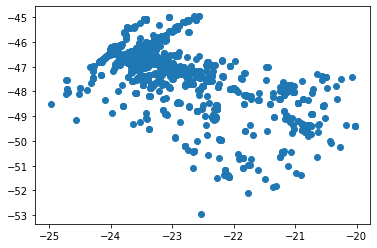

In [189]:
plt.scatter(x=df['LATITUDE'].astype(float), y=df['LONGITUDE'].astype(float))

In [203]:
df['CIDADE_ELABORACAO'] = df['CIDADE_ELABORACAO'].apply(lambda x: x.replace("SÃO ", "S.").replace("SAO ", "S.").replace("S.ANDRE", "SANTO ANDRE").replace("MOGI DAS", "MOJI DAS").replace("S.CRUZ DA CONCEICAO", "SANTA CRUZ DA CONCEICAO"))

In [207]:
df['COR'] = df['COR'].apply(lambda x: x.lstrip().rstrip())

In [208]:
df.to_csv("../datasets/formated_MPID.csv")

In [209]:
set(df['COR'])

{'Amarela',
 'Branca',
 'Ignorada',
 'NÃO INFORMADO',
 'Outros',
 'Parda',
 'Preta',
 'REGISTRADO NA PF'}